In [1]:
import pandas as pd 
train_df = pd.read_csv('../data/kaggle/Digit Recognizer/train.csv')
test_df = pd.read_csv('../data/kaggle/Digit Recognizer/test.csv')

np.random.shuffle(train_df.values)
np.random.shuffle(test_df.values)

In [2]:
y_train = train_df.label
x_train = train_df.drop('label',axis=1)


In [3]:
import numpy as np
y_train = np.array(y_train)
x_train = np.array(x_train)
x_test = np.array(test_df)

In [4]:
import tensorflow as tf
from keras.utils import np_utils
x_train, x_test = x_train / 255.0, x_test / 255.0
y =  np_utils.to_categorical(y_train, num_classes=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [5]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3 , strides=(1, 1),kernel_initializer = 'he_normal',input_shape=(28, 28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))


model.add(layers.Conv2D(64,kernel_size=2 , strides=(1, 1),kernel_initializer = 'he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))

#model.add(layers.Conv2D(128,kernel_size=3 , strides=(1, 1),kernel_initializer = 'he_normal'))
#model.add(layers.BatchNormalization())
#model.add(layers.Activation('relu'))

model.add(layers.Flatten())

model.add(layers.Dense(3686))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#LeNet5
# 0.97857  --ep = 5  CNN
# 0.98242  --ep = 20 CNN 
# 0.97128  --ep = 20 CNN + dropout
# 0.985    --ep = 5 CNN

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 64)        0

In [7]:
x = np.reshape(x_train , (42000,28,28))
x = np.expand_dims(x, axis=-1)
model_args = dict(
    epochs=5,validation_split=0.1,batch_size = 32,
    
)
model.fit(x, y_train, **model_args)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 82s 2ms/sample - loss: 0.1940 - acc: 0.9531 - val_loss: 0.0714 - val_acc: 0.9810
Epoch 2/5
37800/37800 [==============================] - 82s 2ms/sample - loss: 0.0741 - acc: 0.9797 - val_loss: 0.0531 - val_acc: 0.9874
Epoch 3/5
37800/37800 [==============================] - 82s 2ms/sample - loss: 0.0632 - acc: 0.9833 - val_loss: 0.1013 - val_acc: 0.9745
Epoch 4/5
37800/37800 [==============================] - 82s 2ms/sample - loss: 0.0444 - acc: 0.9880 - val_loss: 0.0649 - val_acc: 0.9869
Epoch 5/5
37800/37800 [==============================] - 82s 2ms/sample - loss: 0.0432 - acc: 0.9883 - val_loss: 0.0531 - val_acc: 0.9869


In [8]:
model.evaluate(x,  y_train, verbose=2)
x_test = np.reshape(x_test , (28000,28,28))
x_test = np.expand_dims(x_test ,  axis=-1)
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)

42000/42000 - 13s - loss: 0.0185 - acc: 0.9942


In [1]:
import csv
with open('../data/kaggle/Digit Recognizer/DesignCNN_ep20.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)
  writer.writerow(['ImageId','Label'])
  for r in range(len(y_test)):
    writer.writerow([str(r+1),str(y_test[r])])


NameError: name 'y_test' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('../data/kaggle/Digit Recognizer/train.csv')
test = pd.read_csv('../data/kaggle/Digit Recognizer/test.csv')
sample_submission = pd.read_csv('../data/kaggle/Digit Recognizer/sample_submission.csv')
print(train.shape)
print(test.shape)
x_train = train.iloc[:,1:786]
y_train = train.iloc[:,0]


(42000, 785)
(28000, 784)


In [5]:
network = models.Sequential()
network.add(layers.Dense(784 , activation = 'relu' , input_shape = (28*28,)))
network.add(layers.Dense(784 , activation = 'relu' , input_shape = (28*28,)))
network.add(layers.Dense(10 , activation = 'softmax'))

network.compile(optimizer='adam' ,
                loss = 'categorical_crossentropy' ,
                metrics = ['accuracy'])

In [6]:
x_train = x_train.values.reshape((42000,28*28))   #42000 are images
x_train = x_train.astype('float32') /255
test = test.values.reshape((28000,28*28))     #28000 are images 
test = test.astype('float32') /255

In [7]:
y_train = to_categorical(y_train)
print(test.shape)
print(y_train.shape)
print(x_train.shape)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=4)

(28000, 784)
(42000, 10)
(42000, 784)


In [8]:
network.fit(x_train , y_train , epochs = 100 , batch_size = 128)


Epoch 1/100
42000/42000 [==============================] - 6s 138us/step - loss: 0.2322 - accuracy: 0.9287
Epoch 2/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.0857 - accuracy: 0.9726
Epoch 3/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.0507 - accuracy: 0.9836
Epoch 4/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0342 - accuracy: 0.9893
Epoch 5/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0256 - accuracy: 0.9912
Epoch 6/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.0209 - accuracy: 0.9931
Epoch 7/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0194 - accuracy: 0.9935
Epoch 8/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.0164 - accuracy: 0.9944
Epoch 9/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0136 - accuracy: 0.9953
Epoch 10/100
42000/42000 [==========

42000/42000 [==============================] - 6s 137us/step - loss: 6.0941e-08 - accuracy: 1.0000
Epoch 75/100
42000/42000 [==============================] - 6s 137us/step - loss: 4.8248e-08 - accuracy: 1.0000
Epoch 76/100
42000/42000 [==============================] - 6s 136us/step - loss: 4.1964e-08 - accuracy: 1.0000
Epoch 77/100
18176/42000 [===========>..................] - ETA: 3s - loss: 3.4557e-08 - accuracy: 1.0000

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-17db67a2c83a>", line 1, in <module>
    network.fit(x_train , y_train , epochs = 100 , batch_size = 128)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 196, in fit_loop
    outs = fit_function(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py", line 3292, in __call__
    run_metadata=self.run_metadata)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1458, in __call__
    run_metadata_ptr)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/

KeyboardInterrupt: 

In [9]:
test_loss , test_acc = network.evaluate(X_val , Y_val)
print("Accuracy:", test_acc *100,'%', 'Loss:', test_loss *100)

4200/4200 [==============================] - 0s 75us/step
Accuracy: 100.0 % Loss: 2.8411339280797253e-06


In [11]:
results = network.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [13]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [30]:
Final_results = sample_submission
Final_results['Label'] = results
Final_results.head()
Final_results.to_csv('../data/kaggle/Digit Recognizer/sample_submission.csv', index=False)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=np.argmax(Y_val, axis=1), y_pred=np.argmax(network.predict(X_val), axis=1))

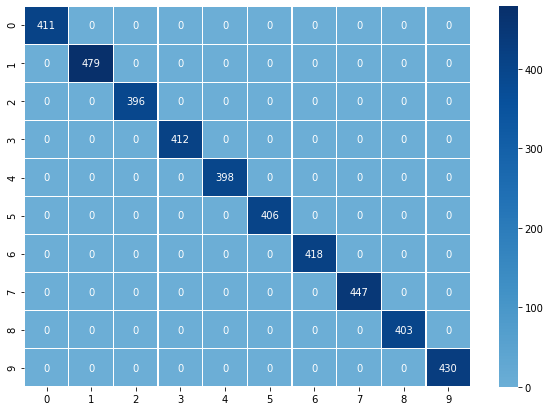

In [29]:
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(data=cm_df, cmap=plt.cm.Blues, center=0.5, annot=True, fmt='.0f', linewidths=.3)